## Intro to scikit learn
this notebook covers  some of the most useful functions of the scikit library

whats going to be covered:


0. workflow of scikit learn
1. getting the data ready
2. choose right estimator/algorithm for our problems
3. fit the model/algo and use it to make predictions on the data
4. evaluating a model
5. improve a model
6. Save and load a trained model
7. Putting it all together

## 0 an end end to scikit workflow

In [6]:
#1 Getting the Data Ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
hd=pd.read_csv("heart-disease (1).csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
## Create X which is called feature matrix,data
X=hd.drop("target",axis=1)
## create Y which is called the labels 
Y=hd["target"]

In [4]:
##2 Choose the right the model and hyper parameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Getting Data Ready

## 3 main things 
1. Split into feature,label column usually X and y
2. Filling aka imputing or disregarding missing values
3. Convert non numerical values to numerical values

In [7]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
X=hd.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
y=hd["target"]

In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [11]:
##splitting into training and test sets
from sklearn.model_selection import train_test_split
## returns 4 values 
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [12]:
Xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [13]:
Xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3


In [15]:
#1.1 Making sure all data is all numerical
carsales=pd.read_csv("car-sales-extended.csv")
carsales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [17]:
carsales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [19]:
## Split into x and y 
X=carsales.drop("Price",axis=1)
y=carsales["Price"]
Xtest,Xtrain,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [20]:
## build a machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

ValueError: could not convert string to float: 'Toyota'

In [27]:
## convert strings into number int
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catFeatures=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,catFeatures)],remainder="passthrough")
transformedX=transformer.fit_transform(X)
transformedX
pd.DataFrame(transformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [26]:
dummies=pd.get_dummies(carsales[["Make","Doors","Colour"]],dtype="int")
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [31]:
np.random.seed(42)
Xtrain,Xtest,ytrain,ytest=train_test_split(transformedX,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)


0.3235867221569877

In [33]:
##gives lower result as it doesnt feed the remaining columns only the 3 we selected i.e Make ,Door,Colour
np.random.seed(40)
Xtrainn,Xtestt,ytrainn,ytestt=train_test_split(dummies,y,test_size=0.2)
model.fit(Xtrainn,ytrainn)
model.score(Xtestt,ytestt)

0.13627023446779662

In [35]:
carsalesmissing=pd.read_csv("car-sales-extended-missing-data.csv")
carsalesmissing.head(20)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [37]:
carsalesmissing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
X=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]
## convert strings into number int
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catFeatures=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,catFeatures)],remainder="passthrough")
transformedX=transformer.fit_transform(X)
transformedX
pd.DataFrame(transformedX)

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...
...,...
995,<Compressed Sparse Row sparse matrix of dtype ...
996,<Compressed Sparse Row sparse matrix of dtype ...
997,<Compressed Sparse Row sparse matrix of dtype ...
998,<Compressed Sparse Row sparse matrix of dtype ...


In [39]:
np.random.seed(42)
Xtrain,Xtest,ytrain,ytest=train_test_split(transformedX,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

ValueError: Input y contains NaN.

## MISSING VALUES
We can either fill the missing values or just remove them

In [41]:

carsalesmissing.fillna({"Make":"Missing"},inplace=True)

In [42]:
carsalesmissing.isna().sum()

Make              0
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
carsalesmissing.fillna({"Colour":"Missing"},inplace=True)

In [45]:
carsalesmissing.fillna({"Odometer (KM)":carsalesmissing["Odometer (KM)"].mean()},inplace=True)

In [46]:
carsalesmissing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

In [47]:
carsalesmissing.fillna({"Doors":4},inplace=True)

In [50]:
carsalesmissing.isna().sum()
##Remove rows with missing price value

carsalesmissing.dropna(inplace=True)

In [51]:
carsalesmissing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [53]:
X=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catFeatures=["Make","Colour","Doors"]
one_hot=OneHotEncoder(sparse_output=False)
transformer=ColumnTransformer([("one_hot",one_hot,catFeatures)],remainder="passthrough")
transformedX=transformer.fit_transform(X)
transformedX
pd.DataFrame(transformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [59]:
np.random.seed(42)
Xtrain,Xtest,ytrain,ytest=train_test_split(transformedX,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.22233003292603104

In [67]:
carsalesmissing1=pd.read_csv("car-sales-extended-missing-data.csv")
carsalesmissing1

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [69]:
carsalesmissing1.dropna(subset=["Price"], inplace=True)

In [70]:
carsalesmissing1

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [71]:
X=carsalesmissing1.drop("Price",axis=1)
y=carsalesmissing1["Price"]

In [72]:
np.random.seed(42)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
catimputer=SimpleImputer(strategy="constant",fill_value="missing")
doorimputer=SimpleImputer(strategy="constant",fill_value=4)
numimputer=SimpleImputer(strategy="mean")
catfeatures=["Make","Colour"]
doorfeatures=["Doors"]
numfeatures=["Odometer (KM)"]
imputer=ColumnTransformer([("catimputer",catimputer,catfeatures),("doorimputer",doorimputer,doorfeatures),("numimputer",numimputer,numfeatures)])
fillx=imputer.fit_transform(X)
fillx

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [78]:
carsalesfilled=pd.DataFrame(fillx,columns=["Make","Colour","Doors","Odometer (KM)"])
carsalesfilled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [79]:
carsalesfilled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catFeatures=["Make","Colour","Doors"]
one_hot=OneHotEncoder(sparse_output=False)
transformer=ColumnTransformer([("one_hot",one_hot,catFeatures)],remainder="passthrough")
transformedX=transformer.fit_transform(carsalesfilled)
transformedX
pd.DataFrame(transformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


In [81]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(transformedX,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.21990196728583944

In [82]:
##imputing is handling missing values
##feature coding is turning categorical data into numerical value

## Choosing the right model/algorithm

* Sklearn refers to machine learning models,algos as estimators
* Classification problem=predicting a category(heart disease or not)
* clf short for classifier
* Regression Problem- Prediciting a number such as selling price of a car

In [83]:
### piciking a machine learnming model for a regression problem
## dataset -> small data that allows u to make some experiments
## we will use caifornia housing dataset

In [11]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [12]:
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [14]:
hf=pd.DataFrame(housing["data"],columns=housing["feature_names"])
hf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
##getting the target column
hf["target"]=housing["target"]
hf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [16]:
hf.drop("MedHouseVal",axis=1,inplace=True)

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
hf

In [ ]:
##import algorithm
np.random.seed(42)
X=hf.drop("target",axis=1)
y=hf["target"]


Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
model1=Lasso()
model=Ridge()

model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)
model1.fit(Xtrain,ytrain)
model1.score(Xtest,ytest)


## Ensemble models
ensemble models are combinations of smaller models to try and make better predictions than just a single a model

In [107]:
##import the random forest regressor model from the ensemble module
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
model=RandomForestRegressor()
X=hf.drop("target",axis=1)
y=hf["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.806652667101436

## Picking a machine learning model for classification problem

In [27]:
import pandas as pd
hd=pd.read_csv("heart-disease (1).csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [111]:
from sklearn.svm import LinearSVC
np.random.seed(42)
clf=LinearSVC()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
clf.fit(Xtrain,ytrain)
clf.score(Xtest,ytest)


0.8688524590163934

In [112]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
clf.fit(Xtrain,ytrain)
clf.score(Xtest,ytest)

0.819672131147541

In [113]:
## if u have structured data use ensemble methods theyll perform better

## fit the model on our data and use it to make predictions

different names for 
* X : features,feature variables,data
* y : target,target variables,labels

## make predictions using machine learning models

In [117]:
## use trained model to make predictions
clf.predict(np.array([1,2,3,4])) ##wouldnt work as the data isnt of the similar nature

C:\Users\Kapil\Desktop\SampleProj1\SciKitLearn\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [118]:
Xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [119]:
clf.predict(Xtest)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [120]:
## Compare predictions with truth labels to evaluate model
ypreds=clf.predict(Xtest)
acc=np.mean(ypreds==ytest)
acc


np.float64(0.819672131147541)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypreds)

0.819672131147541

In [123]:
##predict proba
clf.predict_proba(Xtest[:5])

array([[0.89, 0.11],
       [0.22, 0.78],
       [0.02, 0.98],
       [0.33, 0.67],
       [0.33, 0.67]])

In [124]:
clf.predict(Xtest[:5])

array([0, 1, 1, 1, 1])

In [134]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
model=RandomForestRegressor()
X=hf.drop("target",axis=1)
y=hf["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
model.fit(Xtrain,ytrain)
ypreds=model.predict(Xtest)
model.score(Xtest,ytest)
acc=np.mean(ytest==ypreds)
acc

np.float64(0.0)

In [135]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypreds)

0.32656738464147306

## EVALUATING A MODEL
 Three in built ways to do so:
 
 * Built in score method
 * scoring parameter
 * problem specific metric functions

In [141]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

clf.fit(Xtrain,ytrain)
clf.score(Xtest,ytest)


0.8524590163934426

In [142]:
hf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [145]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model=RandomForestRegressor()
X=hf.drop("target",axis=1)
y=hf["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.806652667101436

## USING THE SCORING METHOD

In [148]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

clf.fit(Xtrain,ytrain)
clf.score(Xtest,ytest)
          

0.8524590163934426

In [152]:
np.random.seed(42)
np.mean(cross_val_score(clf,X,y,cv=5))

np.float64(0.8248087431693989)

In [ ]:
##default scoring parameter of a classifier is mean accuracy
clf.score(Xtest,ytest)

In [153]:
## scoring paramter set to none by default,takes the scoring method of the estimator
np.random.seed(42)
np.mean(cross_val_score(clf,X,y,cv=5,scoring=None))


np.float64(0.8248087431693989)

## Classification evaluation metrices
1. Accuracy
2. Area Under Roc Curve
3. Confusion Matrix
4. Classification Report


Accuracy

In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np 
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
np.mean(cross_val_score(clf,X,y,cv=5,scoring=None))
print(f"Heart Disease Cross Validated Accuracy {np.mean(cross_val_score(clf,X,y,cv=5))*100:.2f}")

NameError: name 'hd' is not defined

Area Under The ROC Curve

** AREA UNDER CURVE (AUC) OR ROC
ROC curves are a comparison of a models true positive rate versus a models false positive rate
* True positive is when model predicts 1 when truth is 1
* False positive is when model predicts 1 when truth is 0

* True negative is when model predicts 0 when truth is 0
* False negative is when model predicts 0 when truth is 1


In [162]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [167]:
np.random.seed(42)
from sklearn.metrics import roc_curve
clf.fit(Xtrain,ytrain)
ypreds=clf.predict_proba(Xtest)
ypreds

array([[0.25, 0.75],
       [0.28, 0.72],
       [0.4 , 0.6 ],
       [0.65, 0.35],
       [0.07, 0.93],
       [0.3 , 0.7 ],
       [0.85, 0.15],
       [0.83, 0.17],
       [0.17, 0.83],
       [0.41, 0.59],
       [0.14, 0.86],
       [0.66, 0.34],
       [0.01, 0.99],
       [0.66, 0.34],
       [0.02, 0.98],
       [0.4 , 0.6 ],
       [0.31, 0.69],
       [0.86, 0.14],
       [0.67, 0.33],
       [0.52, 0.48],
       [0.22, 0.78],
       [0.2 , 0.8 ],
       [0.88, 0.12],
       [0.15, 0.85],
       [0.24, 0.76],
       [0.56, 0.44],
       [0.94, 0.06],
       [0.89, 0.11],
       [0.31, 0.69],
       [0.  , 1.  ],
       [0.24, 0.76],
       [0.31, 0.69],
       [0.23, 0.77],
       [0.94, 0.06],
       [0.7 , 0.3 ],
       [0.35, 0.65],
       [0.08, 0.92],
       [0.24, 0.76],
       [0.  , 1.  ],
       [0.83, 0.17],
       [0.17, 0.83],
       [0.61, 0.39],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.17, 0.83],
       [0.13, 0.87],
       [1.  ,

In [170]:
## getting the positive values
ypos=ypreds[:,1]
ypos

array([0.75, 0.72, 0.6 , 0.35, 0.93, 0.7 , 0.15, 0.17, 0.83, 0.59, 0.86,
       0.34, 0.99, 0.34, 0.98, 0.6 , 0.69, 0.14, 0.33, 0.48, 0.78, 0.8 ,
       0.12, 0.85, 0.76, 0.44, 0.06, 0.11, 0.69, 1.  , 0.76, 0.69, 0.77,
       0.06, 0.3 , 0.65, 0.92, 0.76, 1.  , 0.17, 0.83, 0.39, 0.95, 0.  ,
       0.75, 0.83, 0.87, 0.  , 0.04, 0.06, 0.29, 0.92, 0.9 , 0.78, 0.15,
       0.69, 0.62, 0.  , 0.73, 0.56, 0.11])

In [172]:
fpr,tpr,thresholds=roc_curve(ytest,ypos)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.13793103, 0.13793103, 0.20689655, 0.27586207, 0.31034483,
       0.31034483, 0.4137931 , 0.4137931 , 0.48275862, 0.48275862,
       0.62068966, 0.68965517, 0.75862069, 0.86206897, 0.89655172,
       1.        ])

In [173]:
tpr

array([0.     , 0.0625 , 0.1875 , 0.25   , 0.375  , 0.46875, 0.46875,
       0.5    , 0.53125, 0.59375, 0.625  , 0.71875, 0.78125, 0.78125,
       0.8125 , 0.84375, 0.84375, 0.90625, 0.90625, 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     ])

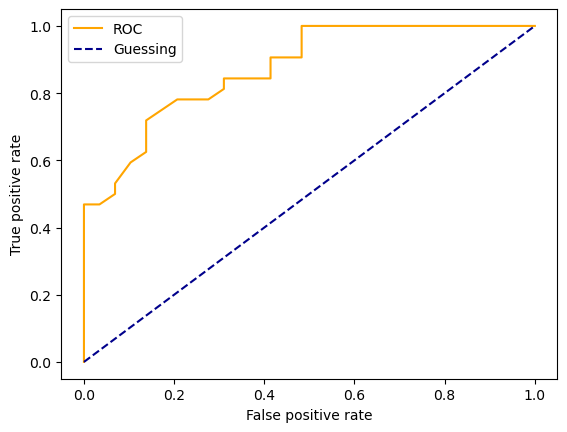

In [179]:
import matplotlib.pyplot as plt
def plotcurve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend()


plotcurve(fpr,tpr)

In [182]:
from sklearn.metrics import roc_auc_score
rocscore=roc_auc_score(ytest,ypos)
rocscore

np.float64(0.8733836206896552)

## Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual label it predicts,giving an idea where the model is getting confused

In [32]:
np.random.seed(42)
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
clf.fit(Xtrain,ytrain)
ypreds=clf.predict(Xtest)

In [33]:
##visualise with crosstab
pd.crosstab(ytest,ypreds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [194]:
## 5 is when false positive # 4 is false negative

<Axes: >

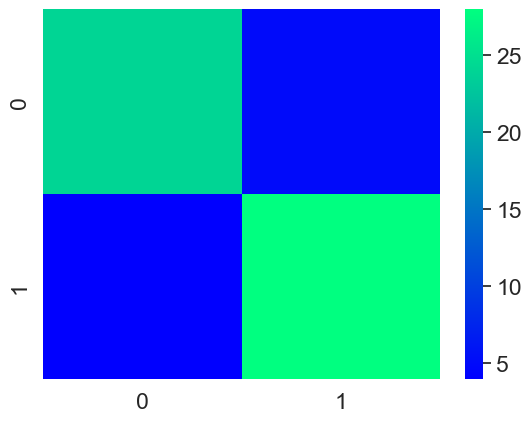

In [34]:
## visualising the matrix with seaborn
import seaborn as sns
sns.set(font_scale=1.5)
cf=confusion_matrix(ytest,ypreds)
sns.heatmap(cf,cmap="winter")


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
